# <span style="color:green"> **Assignment 1: Simple Linear Regression**</span>

## <span style="color:green"> **Modules & Packages**</span>

In [23]:
# Pandas: To manipulate DataFrames
import pandas as pd
# Seaborn & Matplotlib: To plot scatter plots
import seaborn as sns
import matplotlib.pyplot as plt
# Statsmodels: To estimate our regression model
import statsmodels.api as sm

## <span style="color:green"> **The Dataset**</span>
Our final dataset we will be the result of a concatenation between two columns that lie in two seperate sheets of an excel file. Below, we'll perform some manipulations to construct the desired dataset.

In [18]:
# Define a list containing the Excel sheet names
sheet_titles = ["US PMI", "China PMI"]

# Create an empty dictionary within which will be stored the original tables
datasets = {}

# Retrieve the tables from the Excel file and store them in the empty dictionary
for title in sheet_titles:
    dataset = pd.read_excel("PMI-Data.xlsx", sheet_name = title, skiprows = range(5), usecols = 'A:D', index_col = 0)[::-1]
    # Store the US and China tables in the "datasets" dictionary
    datasets[title] = dataset

# Rename columns of interest
datasets["US PMI"].rename(columns = {"% Change" : "US_PMI % Change"}, inplace = True)
datasets["China PMI"].rename(columns = {"% Change" : "China_PMI % Change"}, inplace = True)

In [19]:
# Reset the index column of each dataset (remove dates)
datasets["US PMI"].reset_index(inplace = True)
datasets["China PMI"].reset_index(inplace = True)

In [20]:
# Concetenate the "US_PMI % Change" and "China_PMI % Change" columns to create the final dataset
df = pd.concat([datasets["US PMI"]["US_PMI % Change"], datasets["China PMI"]["China_PMI % Change"]], axis = 1)

# Remove missing values
df.dropna(inplace = True)

# Display final DataFrame
df

,US_PMI % Change,China_PMI % Change
1,0.194932,-0.809717
2,1.556420,2.448980
3,0.957854,-0.199203
4,-5.502846,0.000000
5,2.610442,-0.199601
...,...,...
72,-2.977233,-0.397614
73,1.263538,0.199601
74,-5.525847,-1.394422
75,-0.377358,-4.242424


## <span style="color:green"> **Summary Statistics & Visualization**</span>

In [22]:
# Use the describe() method to find the mean, standard deviation, maximum and minimum of each variable
df.describe()

,US_PMI % Change,China_PMI % Change
count,76.000000,76.000000
mean,0.116612,0.186036
std,4.031510,6.345693
min,-15.274949,-28.600000
25%,-2.050543,-0.795672
50%,0.000000,-0.195887
75%,1.865993,0.586818
max,20.459770,45.658263


<AxesSubplot:title={'center':'Scatterplot: US PMI % Change vs. China PMI % Change'}, xlabel='China_PMI % Change', ylabel='US_PMI % Change'>

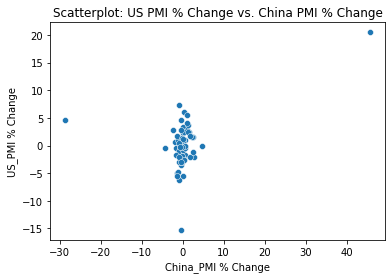

In [24]:
# Display a scatter plot to get a feel for the relationship between both variables
scatter_initial = sns.scatterplot(x = "China_PMI % Change", y = "US_PMI % Change", data = df)
scatter_initial.set(title = "Scatterplot: US PMI % Change vs. China PMI % Change")
scatter_initial

## <span style="color:green"> **Simple OLS Regression**</span>

In [25]:
# Define dependant (y) and independent (x) variables
x = df["China_PMI % Change"]
y = df["US_PMI % Change"]

# Add a constant to the predictor variable (intercept)
x = sm.add_constant(x)

# Fit the OLS model to the sample data
model_ols = sm.OLS(y, x).fit()

# View model summary (intercept, coefficient, r-squared)
model_ols.summary()

C:\Users\joelc\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        US_PMI % Change   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     18.67
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           4.77e-05
Time:                        16:24:42   Log-Likelihood:                -204.74
No. Observations:                  76   AIC:                             413.5
Df Residuals:                      74   BIC:                             418.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0636      0.416      0.153      0.879      -0.766       0.893
China_PMI % Change     0.2852      0.066      4.321      0.000       0.154       0.417
==============================================================================
Omnibus:                       15.915   Durbin-Watson:                   2.300
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.742
Skew:                          -0.265   Prob(JB):                     5.30e-15
Kurtosis:                       7.525   Cond. No.                         6.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Estimated model**: ``US_PMI % Change = 0.0636 + 0.2852 * China_PMI % Change``